<img src="https://assets.entrepreneur.com/content/3x2/2000/1405612741-airbnb-why-new-logo.jpg" style="float: left; margin: 20px; height: 80px">

# Project 4: Analyzing Airbnb's Listings
_Done by: Chia Dao Zhe_

---
#### Airbnb operates an online marketplace which offers hospitality service and is accessible via its websites and mobile apps. Members can use the service to arrange or offer lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; as a broker, it receives commissions from every booking.

#### Airbnb takes 3% commission of every booking from hosts, and between 6% and 12% from guests. However, Airbnb also faces strong competition from other similar companies such as Tripping.com, FlipKey, HomeAway, or even the more traditional booking.com and expedia.

#### Needless to say, it is therefore in Airbnb's interest that potential guests like what they see on Airbnb's page.

## 1. Problem Statement(s)

* Are we able to develop a model that can predict whether a listing will be attractive to potential guests?
* Based on that information, are we then able to better advise hosts on how they can make their listing on Airbnb look more attractive?
* Are we able to create a universal model for all travel locations, or must it be country/city specific?

## 2. Exploratory Data Analysis (EDA)

All airbnb data for this project is obtained here: http://insideairbnb.com/get-the-data.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
melb = pd.read_csv('/Users/FeliciaWilliams/Documents/GitHub/GA_Projects/Project 4/melbourne.csv')

/Users/FeliciaWilliams/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (43,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
melb.shape

(21450, 96)

In [4]:
melb.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,20180808195713,2018-08-09,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",none,Very safe! Family oriented. Older age group.,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.05


In [5]:
melb.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [6]:
count = 0
for i in melb.columns:
    count += 1
    print(str(count)+ ". " + i)

1. id
2. listing_url
3. scrape_id
4. last_scraped
5. name
6. summary
7. space
8. description
9. experiences_offered
10. neighborhood_overview
11. notes
12. transit
13. access
14. interaction
15. house_rules
16. thumbnail_url
17. medium_url
18. picture_url
19. xl_picture_url
20. host_id
21. host_url
22. host_name
23. host_since
24. host_location
25. host_about
26. host_response_time
27. host_response_rate
28. host_acceptance_rate
29. host_is_superhost
30. host_thumbnail_url
31. host_picture_url
32. host_neighbourhood
33. host_listings_count
34. host_total_listings_count
35. host_verifications
36. host_has_profile_pic
37. host_identity_verified
38. street
39. neighbourhood
40. neighbourhood_cleansed
41. neighbourhood_group_cleansed
42. city
43. state
44. zipcode
45. market
46. smart_location
47. country_code
48. country
49. latitude
50. longitude
51. is_location_exact
52. property_type
53. room_type
54. accommodates
55. bathrooms
56. bedrooms
57. beds
58. bed_type
59. amenities
60. squar

1. id - remove as identifier for airbnb's own reference
2. listing_url - remove as url
3. scrape_id - remove as identifier for scraper's own reference
4. last_scraped - remove as date for scraper's own reference
5. name - keep to find any naming trends
6. summary - keep to find any description trends
7. space - remove as similar to summary
8. description - remove as similar to summary
9. experiences_offered - remove as similar to summary
10. neighborhood_overview - remove as similar to summary
11. notes - remove as similar to summary
12. transit - remove as similar to summary
13. access - remove as lat/lon will be used as location
14. interaction - remove as similar to summary
15. house_rules - remove as similar to summary
16. thumbnail_url - remove as url
17. medium_url - remove as url
18. picture_url - remove as url
19. xl_picture_url - remove as url
20. host_id - remove as identifier for airbnb's own reference
21. host_url - remove as url
22. host_name - remove as identifier
23. host_since - remove as insignificant as property information is more important
24. host_location - remove as insignificant as property information is more important
25. host_about - remove as insignificant as property information is more important
26. host_response_time - keep to see if responsiveness make guests feel better
27. host_response_rate - keep to see if responsiveness make guests feel better
28. host_acceptance_rate - remove as similar to host response
29. host_is_superhost - keep to see if this rating matters
30. host_thumbnail_url - remove as url
31. host_picture_url - remove as url
32. host_neighbourhood - remove as insignificant as property information is more important
33. host_listings_count - remove as insignificant as property information is more important
34. host_total_listings_count - remove as insignificant as property information is more important
35. host_verifications - remove as insignificant as property information is more important
36. host_has_profile_pic - remove as insignificant as property information is more important
37. host_identity_verified - keep to see if guests like verification
38. street - remove as lat/lon will be used as location
39. neighbourhood - remove as lat/lon will be used as location
40. neighbourhood_cleansed - remove as lat/lon will be used as location
41. neighbourhood_group_cleansed - remove as lat/lon will be used as location
42. city - remove as lat/lon will be used as location
43. state - remove as lat/lon will be used as location
44. zipcode - remove as lat/lon will be used as location
45. market - remove as lat/lon will be used as location
46. smart_location - remove as lat/lon will be used as location
47. country_code - remove as lat/lon will be used as location
48. country - remove as lat/lon will be used as location
49. latitude - keep as location data
50. longitude - keep as location data
51. is_location_exact - remove as lat/lon will be used as location
52. property_type - keep to see if this rating matters
53. room_type - keep to see if this rating matters
54. accommodates - keep to see if this rating matters
55. bathrooms - keep to see if this rating matters
56. bedrooms - keep to see if this rating matters
57. beds - keep to see if this rating matters
58. bed_type - remove as similar to beds
59. amenities - keep to see if this rating matters
60. square_feet - keep to see if this rating matters
61. price - keep to see if this rating matters
62. weekly_price - remove as similar to price
63. monthly_price - remove as similar to price
64. security_deposit - remove as similar to price
65. cleaning_fee - remove as similar to price
66. guests_included - remove as similar to accommodates
67. extra_people - remove as similar to accommodates
68. minimum_nights - remove as similar to price
69. maximum_nights - remove as similar to price
70. calendar_updated - remove as similar to price
71. has_availability - remove as insignificant 
72. availability_30 - remove as insignificant 
73. availability_60 - remove as insignificant 
74. availability_90 - remove as insignificant 
75. availability_365 - remove as insignificant 
76. calendar_last_scraped - remove as insignificant 
77. number_of_reviews - keep to see if this rating matters
78. first_review - remove as insignificant 
79. last_review - remove as insignificant 
80. review_scores_rating - keep to see if this rating matters
81. review_scores_accuracy - keep to see if this rating matters
82. review_scores_cleanliness - keep to see if this rating matters
83. review_scores_checkin - keep to see if this rating matters
84. review_scores_communication - keep to see if this rating matters
85. review_scores_location - keep to see if this rating matters
86. review_scores_value - keep to see if this rating matters
87. requires_license - remove as insignificant 
88. license - remove as insignificant 
89. jurisdiction_names - remove as insignificant 
90. instant_bookable - keep to see if this rating matters 
91. is_business_travel_ready - remove as insignificant 
92. cancellation_policy - keep to see if this rating matters 
93. require_guest_profile_picture - remove as insignificant 
94. require_guest_phone_verification - remove as insignificant 
95. calculated_host_listings_count - remove as insignificant 
96. reviews_per_month - TARGET used as proxy

In [7]:
melb.drop(['id', 'listing_url', 'scrape_id', 'last_scraped',
           'space', 'description', 'experiences_offered', 'neighborhood_overview',
           'notes', 'transit', 'access', 'interaction', 'house_rules',
           'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
           'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
           'host_about', 'host_acceptance_rate', 'host_thumbnail_url',
           'host_picture_url', 'host_neighbourhood', 'host_listings_count',
           'host_total_listings_count', 'host_verifications',
           'host_has_profile_pic', 'street', 'neighbourhood', 'neighbourhood_cleansed',
           'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
           'smart_location', 'country_code', 'country', 'is_location_exact',
           'bed_type', 'weekly_price', 'monthly_price', 'security_deposit',
           'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
           'calendar_updated', 'has_availability', 'availability_30', 'availability_60',
           'availability_90','availability_365', 'calendar_last_scraped',
           'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names',
           'is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification',
           'calculated_host_listings_count'], axis=1, inplace=True)

In [8]:
melb.shape

(21450, 28)

In [9]:
melb.head(1)

,name,summary,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,latitude,longitude,property_type,room_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
0,Beautiful Room & House,NaN,NaN,NaN,f,f,-37.772684,145.092133,House,Private room,...,90.0,9.0,10.0,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period,0.05


In [10]:
melb.isna().sum()

name                               4
summary                          527
host_response_time              6323
host_response_rate              6323
host_is_superhost                  4
host_identity_verified             4
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         22
bedrooms                           5
beds                              28
amenities                          0
square_feet                    21225
price                              0
number_of_reviews                  0
review_scores_rating            5119
review_scores_accuracy          5135
review_scores_cleanliness       5127
review_scores_checkin           5149
review_scores_communication     5133
review_scores_location          5151
review_scores_value             5153
instant_bookable                   0
cancellation_policy                0
r

## Consideration 1: To consider how to deal with all the empty rows.

#### We will drop square_feet as most of the inputs are NA.

#### For the other features that are numerical, we can fill the null values with 0 as though no information was given.
* bathrooms
* bedrooms
* beds
* review_scores_rating
* review_scores_accuracy
* review_scores_cleanliness
* review_scores_checkin
* review_scores_communication
* review_scores_location
* review_scores_value
* reviews_per_month

In [11]:
melb.drop('square_feet', axis=1, inplace=True)

In [12]:
melb.update(melb[['bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
      'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value',
      'reviews_per_month']].fillna(0))

melb.isna().sum()

name                              4
summary                         527
host_response_time             6323
host_response_rate             6323
host_is_superhost                 4
host_identity_verified            4
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
amenities                         0
price                             0
number_of_reviews                 0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
instant_bookable                  0
cancellation_policy               0
reviews_per_month                 0
dtype: int64

#### For other non "free text" columns, we will try to populate the NA values with the appropriate information.

In [13]:
melb[['host_response_time', 'host_response_rate', 'host_is_superhost', 'host_identity_verified']].nunique()

host_response_time         4
host_response_rate        59
host_is_superhost          2
host_identity_verified     2
dtype: int64

In [14]:
melb.host_response_rate.value_counts()

100%    12626
90%       296
0%        258
99%       205
80%       150
83%       147
98%       145
97%       140
50%       134
94%        98
67%        91
95%        76
96%        71
93%        70
75%        68
91%        65
86%        52
92%        52
88%        49
60%        45
70%        39
89%        39
33%        31
38%        18
25%        15
71%        13
40%        13
78%        11
85%         9
87%         9
42%         9
72%         9
82%         8
79%         8
55%         6
29%         6
20%         4
30%         4
77%         4
48%         4
56%         3
74%         3
46%         3
43%         3
14%         2
17%         2
63%         2
69%         1
76%         1
44%         1
11%         1
36%         1
65%         1
64%         1
13%         1
57%         1
58%         1
22%         1
84%         1
Name: host_response_rate, dtype: int64

In [15]:
melb.host_response_rate.fillna(0, inplace=True)
melb.host_response_rate = melb.host_response_rate.astype(str)

melb.host_response_rate = melb.host_response_rate.map(lambda x: x.lstrip('+-').rstrip('%'))

In [16]:
melb.host_response_rate = melb.host_response_rate.astype(float)
melb.host_response_rate.describe()

count    21450.000000
mean        67.527179
std         45.572993
min          0.000000
25%          0.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: host_response_rate, dtype: float64

In [17]:
melb.host_is_superhost.value_counts()

f    16533
t     4913
Name: host_is_superhost, dtype: int64

In [18]:
melb.host_is_superhost.fillna('f', inplace=True)
melb.host_is_superhost.value_counts()

f    16537
t     4913
Name: host_is_superhost, dtype: int64

In [19]:
melb.host_identity_verified.value_counts()

f    12528
t     8918
Name: host_identity_verified, dtype: int64

In [20]:
melb.host_identity_verified.fillna('f', inplace=True)
melb.host_identity_verified.value_counts()

f    12532
t     8918
Name: host_identity_verified, dtype: int64

In [21]:
melb.host_response_time.value_counts()

within an hour        11168
within a few hours     2152
within a day           1428
a few days or more      379
Name: host_response_time, dtype: int64

In [22]:
melb.host_response_time.fillna('others', inplace=True)
melb.host_response_time.value_counts()

within an hour        11168
others                 6323
within a few hours     2152
within a day           1428
a few days or more      379
Name: host_response_time, dtype: int64

In [23]:
melb.isna().sum()

name                             4
summary                        527
host_response_time               0
host_response_rate               0
host_is_superhost                0
host_identity_verified           0
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                        0
bedrooms                         0
beds                             0
amenities                        0
price                            0
number_of_reviews                0
review_scores_rating             0
review_scores_accuracy           0
review_scores_cleanliness        0
review_scores_checkin            0
review_scores_communication      0
review_scores_location           0
review_scores_value              0
instant_bookable                 0
cancellation_policy              0
reviews_per_month                0
dtype: int64

In [24]:
melb.name.fillna('', inplace=True)
melb.summary.fillna('', inplace=True)
melb.isna().sum()

name                           0
summary                        0
host_response_time             0
host_response_rate             0
host_is_superhost              0
host_identity_verified         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
amenities                      0
price                          0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
cancellation_policy            0
reviews_per_month              0
dtype: int64

## Consideration 2: To consider how to convert all columns into numerical inputs.

In [25]:
melb.dtypes

name                            object
summary                         object
host_response_time              object
host_response_rate             float64
host_is_superhost               object
host_identity_verified          object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
amenities                       object
price                           object
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
instant_bookable                object
cancellation_policy      

### Convert all binary columns from t/f to binary 0/1

In [26]:
#Convert host_is_superhost from t/f to binary 0/1

def f(row):
    if row['host_is_superhost'] == 't':
        val = 0   
    else:
        val = 1
    return val

melb.host_is_superhost = melb.apply(f, axis=1)
melb.host_is_superhost.value_counts()

1    16537
0     4913
Name: host_is_superhost, dtype: int64

In [27]:
#Convert host_identity_verified from t/f to binary 0/1

def f(row):
    if row['host_identity_verified'] == 't':
        val = 0   
    else:
        val = 1
    return val

melb.host_identity_verified = melb.apply(f, axis=1)
melb.host_identity_verified.value_counts()

1    12532
0     8918
Name: host_identity_verified, dtype: int64

In [28]:
#Convert instant_bookable from t/f to binary 0/1

def f(row):
    if row['instant_bookable'] == 't':
        val = 0   
    else:
        val = 1
    return val

melb.instant_bookable = melb.apply(f, axis=1)
melb.instant_bookable.value_counts()

1    11686
0     9764
Name: instant_bookable, dtype: int64

### Convert ordinal categorical columns into numbers.

In [29]:
melb.host_response_time.value_counts()

within an hour        11168
others                 6323
within a few hours     2152
within a day           1428
a few days or more      379
Name: host_response_time, dtype: int64

In [30]:
#Assign numeric value for host_response_time
def f(row):
    if row['host_response_time'] == 'within an hour':
        val = 0
    elif row['host_response_time'] == 'within a few hours':
        val = 1
    elif row['host_response_time'] == 'within a day':
        val = 2
    elif row['host_response_time'] == 'a few days or more':
        val = 3
    else:
        val = 4
    return val

melb.host_response_time = melb.apply(f, axis=1)
melb.host_response_time.value_counts()

0    11168
4     6323
1     2152
2     1428
3      379
Name: host_response_time, dtype: int64

In [31]:
melb.cancellation_policy.value_counts()

strict_14_with_grace_period    8576
flexible                       7221
moderate                       5600
super_strict_30                  40
super_strict_60                  13
Name: cancellation_policy, dtype: int64

In [32]:
#Assign numeric value for cancellation_policy
def f(row):
    if row['cancellation_policy'] == 'flexible':
        val = 0
    elif row['cancellation_policy'] == 'moderate':
        val = 1
    elif row['cancellation_policy'] == 'strict_14_with_grace_period':
        val = 2
    elif row['cancellation_policy'] == 'super_strict_30':
        val = 3
    else:
        val = 4
    return val

melb.cancellation_policy = melb.apply(f, axis=1)
melb.cancellation_policy.value_counts()

2    8576
0    7221
1    5600
3      40
4      13
Name: cancellation_policy, dtype: int64

### Price column should be numeric so just need to clean up the data.

In [33]:
melb.price.head()

0     $61.00
1     $35.00
2    $159.00
3     $50.00
4     $69.00
Name: price, dtype: object

In [34]:
melb.price = melb.price.astype(str)
melb['price'] = melb.price.str.extract('(\d+)', expand=True).astype(float)
melb.price.describe()

count    21450.000000
mean       137.081725
std        113.308407
min          0.000000
25%         69.000000
50%        110.000000
75%        160.000000
max        999.000000
Name: price, dtype: float64

In [35]:
melb.price.head()

0     61.0
1     35.0
2    159.0
3     50.0
4     69.0
Name: price, dtype: float64

### Convert non-ordical categorical columns into numerical data using get_dummies.

In [36]:
melb.room_type.value_counts()

Entire home/apt    13326
Private room        7727
Shared room          397
Name: room_type, dtype: int64

In [37]:
room_df = pd.get_dummies(melb.room_type)
melb = pd.concat([melb,room_df], axis=1)
melb = melb.drop(['room_type', 'Shared room'], axis=1)
melb

,name,summary,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,latitude,longitude,property_type,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,Entire home/apt,Private room
0,Beautiful Room & House,,4,0.0,1,1,-37.772684,145.092133,House,2,...,10.0,10.0,10.0,9.0,9.0,1,2,0.05,0,1
1,Room in Cool Deco Apartment in Brunswick,A large air conditioned room with queen spring...,0,100.0,1,0,-37.766505,144.980736,Apartment,2,...,8.0,9.0,9.0,9.0,9.0,0,1,1.44,0,1
2,Cool Chic Beachside 1 BR Views APT+Garage+WIFI,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,0,100.0,0,0,-37.859755,144.977369,Apartment,3,...,10.0,10.0,10.0,10.0,9.0,1,2,0.13,1,0
3,Large private room-close to city,"Comfortable, relaxed house, a home away from ...",4,0.0,1,0,-37.758971,144.989228,House,1,...,9.0,10.0,10.0,9.0,9.0,1,1,0.31,0,1
4,Melbourne BnB near City & Sports,,4,0.0,1,0,-37.864530,144.992238,House,2,...,9.0,10.0,10.0,9.0,9.0,1,1,0.73,0,1
5,Melbourne - Old Trafford Apartment,Please note: No booking will be accepted with ...,0,100.0,0,0,-38.057254,145.339356,Apartment,5,...,10.0,10.0,10.0,10.0,10.0,1,0,1.13,1,0
6,CLOSE TO CITY & MELBOURNE AIRPORT,Easy to travel from and to the Airport; quiet ...,0,100.0,1,0,-37.697294,145.000816,House,2,...,9.0,10.0,10.0,9.0,9.0,1,2,1.68,0,1
7,Tranquil Javanese Studio and Pond!,A fully self contained Studio Apartment for tw...,0,100.0,0,1,-37.899601,145.114475,Apartment,2,...,10.0,10.0,10.0,9.0,10.0,1,1,1.63,1,0
8,Queen Room in Beautiful House,Light filled private room with Queen bed taste...,0,100.0,0,0,-38.149320,145.141569,House,2,...,10.0,10.0,10.0,10.0,10.0,1,1,0.27,0,1
9,Brighton Homestay-4-Doors-to-Sea,"4 doors to the sea. Bus to St Kilda, the most...",1,100.0,1,1,-37.894065,144.987038,House,1,...,10.0,10.0,10.0,9.0,10.0,1,2,0.39,0,1


In [38]:
melb.property_type.value_counts()

Apartment                 11761
House                      5726
Townhouse                  1311
Serviced apartment          427
Condominium                 398
Villa                       294
Bed and breakfast           251
Guesthouse                  238
Guest suite                 223
Loft                        175
Bungalow                    165
Cottage                     116
Other                        64
Cabin                        48
Hostel                       39
Farm stay                    37
Boutique hotel               35
Camper/RV                    16
Hotel                        16
Nature lodge                 16
Tiny house                   16
Boat                         15
Earth house                  11
Aparthotel                   10
Chalet                        8
Resort                        7
Tent                          6
Castle                        5
Hut                           3
Treehouse                     3
Barn                          3
Campsite

In [39]:
#Simplifying the categories for property_type
def f(row):
    if row['property_type'] == 'Apartment':
        val = 'Apartment'
    elif row['property_type'] == 'House':
        val = 'House'
    elif row['property_type'] == 'Townhouse':
        val = 'Townhouse'
    else:
        val = 'Others'
    return val

melb.property_type = melb.apply(f, axis=1)
melb.property_type.value_counts()

Apartment    11761
House         5726
Others        2652
Townhouse     1311
Name: property_type, dtype: int64

In [40]:
property_df = pd.get_dummies(melb.property_type)
melb = pd.concat([melb,property_df], axis=1)
melb = melb.drop(['property_type', 'Others'], axis=1)
melb

,name,summary,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,latitude,longitude,accommodates,bathrooms,...,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,Entire home/apt,Private room,Apartment,House,Townhouse
0,Beautiful Room & House,,4,0.0,1,1,-37.772684,145.092133,2,1.0,...,9.0,9.0,1,2,0.05,0,1,0,1,0
1,Room in Cool Deco Apartment in Brunswick,A large air conditioned room with queen spring...,0,100.0,1,0,-37.766505,144.980736,2,1.0,...,9.0,9.0,0,1,1.44,0,1,1,0,0
2,Cool Chic Beachside 1 BR Views APT+Garage+WIFI,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,0,100.0,0,0,-37.859755,144.977369,3,1.0,...,10.0,9.0,1,2,0.13,1,0,1,0,0
3,Large private room-close to city,"Comfortable, relaxed house, a home away from ...",4,0.0,1,0,-37.758971,144.989228,1,1.5,...,9.0,9.0,1,1,0.31,0,1,0,1,0
4,Melbourne BnB near City & Sports,,4,0.0,1,0,-37.864530,144.992238,2,1.0,...,9.0,9.0,1,1,0.73,0,1,0,1,0
5,Melbourne - Old Trafford Apartment,Please note: No booking will be accepted with ...,0,100.0,0,0,-38.057254,145.339356,5,1.0,...,10.0,10.0,1,0,1.13,1,0,1,0,0
6,CLOSE TO CITY & MELBOURNE AIRPORT,Easy to travel from and to the Airport; quiet ...,0,100.0,1,0,-37.697294,145.000816,2,1.0,...,9.0,9.0,1,2,1.68,0,1,0,1,0
7,Tranquil Javanese Studio and Pond!,A fully self contained Studio Apartment for tw...,0,100.0,0,1,-37.899601,145.114475,2,1.0,...,9.0,10.0,1,1,1.63,1,0,1,0,0
8,Queen Room in Beautiful House,Light filled private room with Queen bed taste...,0,100.0,0,0,-38.149320,145.141569,2,1.0,...,10.0,10.0,1,1,0.27,0,1,0,1,0
9,Brighton Homestay-4-Doors-to-Sea,"4 doors to the sea. Bus to St Kilda, the most...",1,100.0,1,1,-37.894065,144.987038,1,1.0,...,9.0,10.0,1,2,0.39,0,1,0,1,0


In [41]:
melb.dtypes

name                            object
summary                         object
host_response_time               int64
host_response_rate             float64
host_is_superhost                int64
host_identity_verified           int64
latitude                       float64
longitude                      float64
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
amenities                       object
price                          float64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
instant_bookable                 int64
cancellation_policy              int64
reviews_per_month              float64
Entire home/apt          

### As amenities are fixed items that hosts can indicate whether they have it or not in their property listing, I will choose 10 amenities that seem to be most attractive and create them as binary features (i.e. y/n, 0/1).
* Wifi
* Kitchen
* Air conditioning
* Breakfast
* Private entrance
* Hair dryer
* Free parking on premises
* Essentials (Towels, bed sheets, soap, and toilet paper)
* Hot water
* TV

In [42]:
#Creating the columns for wifi
def f(row):
    if 'Wifi' in row['amenities']:
        val = 0
    else:
        val = 1
    return val

melb.amen_wifi = melb.apply(f, axis=1)

/Users/FeliciaWilliams/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [43]:
#Creating the columns for kitchen
def f(row):
    if 'Kitchen' in row['amenities']:
        val = 0
    else:
        val = 1
    return val

melb.amen_kitchen = melb.apply(f, axis=1)

/Users/FeliciaWilliams/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [44]:
#Creating the columns for Air conditioning
def f(row):
    if 'Air conditioning' in row['amenities']:
        val = 0
    else:
        val = 1
    return val

melb.amen_aircon = melb.apply(f, axis=1)

/Users/FeliciaWilliams/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [45]:
#Creating the columns for breakfast
def f(row):
    if 'Breakfast' in row['amenities']:
        val = 0
    else:
        val = 1
    return val

melb.amen_breakfast = melb.apply(f, axis=1)

/Users/FeliciaWilliams/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [46]:
#Creating the columns for private entrance
def f(row):
    if 'Private entrance' in row['amenities']:
        val = 0
    else:
        val = 1
    return val

melb.amen_pri_ent = melb.apply(f, axis=1)

/Users/FeliciaWilliams/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [47]:
#Creating the columns for hair dryer
def f(row):
    if 'Hair dryer' in row['amenities']:
        val = 0
    else:
        val = 1
    return val

melb.amen_hairdry = melb.apply(f, axis=1)

/Users/FeliciaWilliams/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [48]:
#Creating the columns for free parking
def f(row):
    if 'Free parking on premises' in row['amenities']:
        val = 0
    else:
        val = 1
    return val

melb.amen_parking = melb.apply(f, axis=1)

/Users/FeliciaWilliams/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [49]:
#Creating the columns for essentials
def f(row):
    if 'Essentials' in row['amenities']:
        val = 0
    else:
        val = 1
    return val

melb.amen_essentials = melb.apply(f, axis=1)

/Users/FeliciaWilliams/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [50]:
#Creating the columns for hot water
def f(row):
    if 'Hot water' in row['amenities']:
        val = 0
    else:
        val = 1
    return val

melb.amen_hotwater = melb.apply(f, axis=1)

/Users/FeliciaWilliams/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [51]:
#Creating the columns for tv
def f(row):
    if 'TV' in row['amenities']:
        val = 0
    else:
        val = 1
    return val

melb.amen_tv = melb.apply(f, axis=1)

/Users/FeliciaWilliams/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [52]:
amenities_df = pd.concat([melb.amen_wifi,melb.amen_kitchen,melb.amen_aircon,
                          melb.amen_breakfast,melb.amen_pri_ent,melb.amen_hairdry
                         ,melb.amen_parking,melb.amen_essentials,melb.amen_hotwater,melb.amen_tv], axis=1)

amenities_df.columns = ['amen_wifi', 'amen_kitchen', 'amen_aircon', 'amen_breakfast', 'amen_pri_ent',
                        'amen_hairdry', 'amen_parking', 'amen_essentials', 'amen_hotwater', 'amen_tv']

amenities_df.head()

,amen_wifi,amen_kitchen,amen_aircon,amen_breakfast,amen_pri_ent,amen_hairdry,amen_parking,amen_essentials,amen_hotwater,amen_tv
0,0,1,1,1,1,1,1,1,1,1
1,0,0,0,1,0,0,1,0,0,0
2,0,0,0,1,1,0,0,0,0,0
3,0,0,1,0,1,0,0,0,1,0
4,0,1,1,1,1,1,1,0,1,1


In [53]:
melb = pd.concat([melb, amenities_df], axis=1)
melb.drop('amenities', axis=1, inplace=True)

### In the absence of using TfidfVectorizer, I will create another dataframe without including name and summary columns for now.

In [54]:
melb1 = melb.drop(['name', 'summary'], axis=1)
melb1.dtypes

host_response_time               int64
host_response_rate             float64
host_is_superhost                int64
host_identity_verified           int64
latitude                       float64
longitude                      float64
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
price                          float64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
instant_bookable                 int64
cancellation_policy              int64
reviews_per_month              float64
Entire home/apt                  uint8
Private room                     uint8
Apartment                        uint8
House                    

### Looking at the relationship of price VS number of guests a property can accommodate

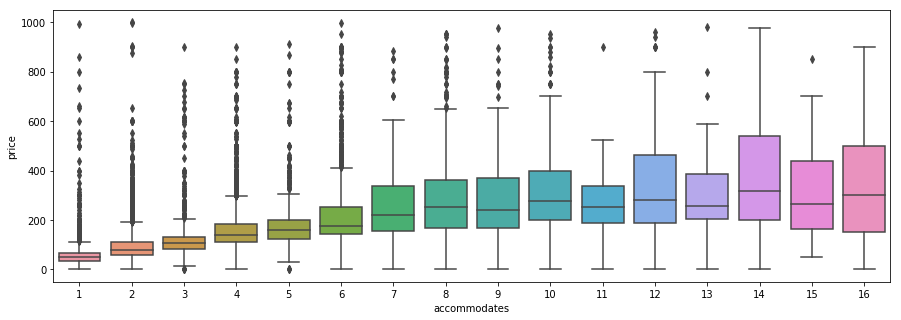

In [55]:
fig, ax = plt.subplots(figsize=(15,5))  
sns.boxplot(melb1.accommodates, melb1.price)

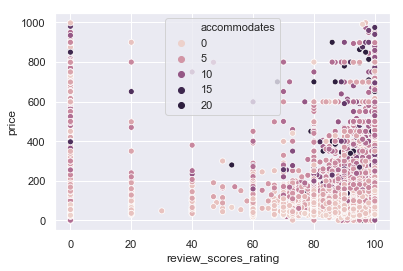

In [56]:
sns.set()
sns.scatterplot(x="review_scores_rating", y="price", hue="accommodates", data=melb1)

## Consideration 3: To review whether any of the feature columns are highly correlated with the target column and/or each other.

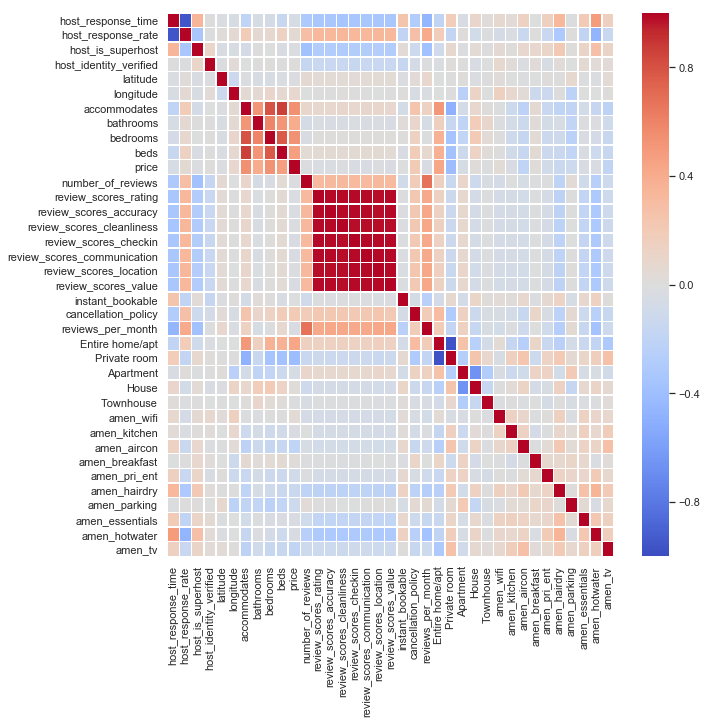

In [57]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(melb1.corr(), vmin=-1, vmax=1, cmap="coolwarm", center=0, linewidths=.5, ax=ax)

### We can see that the review scores for each category of cleanliness, value, etc. are highly correlated with each other and even the review_scores_rating, which makes sense because the overall review_scores_rating can be taken as a sum of all the other review scores put together. As such, to drop all other review scores and to rely on review_scores_rating only.

In [58]:
melb1.drop(['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
            'review_scores_communication','review_scores_location','review_scores_value'],axis=1, inplace=True)

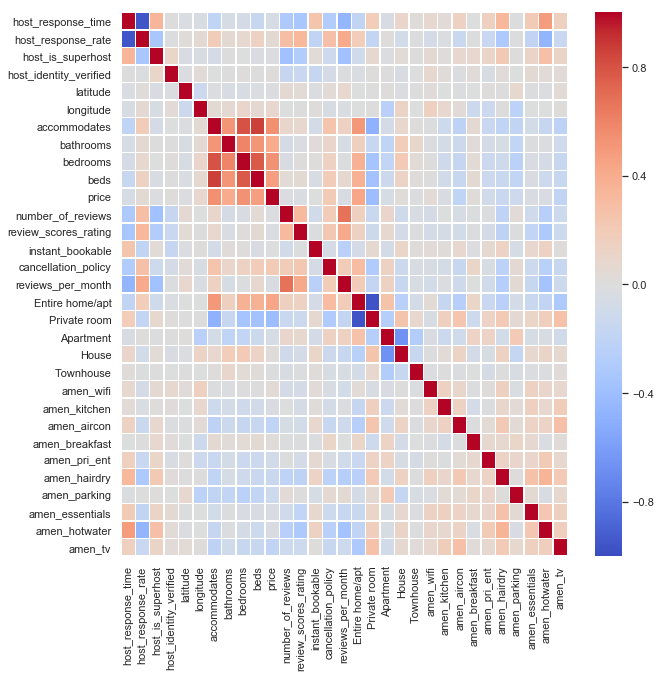

In [59]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(melb1.corr(), vmin=-1, vmax=1, cmap="coolwarm", center=0, linewidths=.5, ax=ax)

In [60]:
melb1.corr()

,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,amen_wifi,amen_kitchen,amen_aircon,amen_breakfast,amen_pri_ent,amen_hairdry,amen_parking,amen_essentials,amen_hotwater,amen_tv
host_response_time,1.000000,-0.957311,0.350199,0.002537,-0.023448,-0.041551,-0.200688,-0.049854,-0.067673,-0.152257,...,0.075364,0.034684,0.147637,-0.006376,0.149991,0.334815,-0.013559,0.200180,0.484768,0.151293
host_response_rate,-0.957311,1.000000,-0.334060,-0.012808,0.015842,0.059555,0.192336,0.058697,0.075214,0.148401,...,-0.065773,-0.028267,-0.133437,0.000754,-0.146130,-0.318704,0.002835,-0.193261,-0.466074,-0.145816
host_is_superhost,0.350199,-0.334060,1.000000,0.103634,-0.034350,-0.046655,-0.066225,0.001138,-0.004083,-0.034030,...,0.060788,0.008731,0.079272,0.084113,0.103535,0.216537,0.013509,0.116168,0.275772,0.116857
host_identity_verified,0.002537,-0.012808,0.103634,1.000000,-0.016956,0.031408,-0.002074,0.001042,0.010018,0.004028,...,0.073634,0.027696,-0.016440,0.023934,-0.039737,0.030347,-0.003017,0.048238,0.032352,0.038252
latitude,-0.023448,0.015842,-0.034350,-0.016956,1.000000,-0.126179,-0.018084,-0.043898,-0.043095,-0.027144,...,0.024394,-0.002449,-0.010166,-0.005380,0.009974,0.003434,0.072718,-0.010161,-0.016170,0.045408
longitude,-0.041551,0.059555,-0.046655,0.031408,-0.126179,1.000000,0.054433,0.061858,0.095686,0.065584,...,0.152866,0.082435,0.034852,-0.124346,-0.130742,0.001094,-0.223290,-0.000022,-0.003884,0.009702
accommodates,-0.200688,0.192336,-0.066225,-0.002074,-0.018084,0.054433,1.000000,0.521999,0.803749,0.860723,...,-0.010409,-0.111686,-0.217365,0.062464,-0.144618,-0.202777,-0.191015,-0.084713,-0.161134,-0.211803
bathrooms,-0.049854,0.058697,0.001138,0.001042,-0.043898,0.061858,0.521999,1.000000,0.598791,0.517345,...,-0.018547,-0.075929,-0.121614,0.028206,-0.073732,-0.050707,-0.186773,-0.012582,-0.021991,-0.099936
bedrooms,-0.067673,0.075214,-0.004083,0.010018,-0.043095,0.095686,0.803749,0.598791,1.000000,0.767545,...,0.002051,-0.107767,-0.157230,0.044301,-0.127487,-0.105162,-0.233535,-0.034796,-0.067841,-0.151130
beds,-0.152257,0.148401,-0.034030,0.004028,-0.027144,0.065584,0.860723,0.517345,0.767545,1.000000,...,0.003665,-0.091722,-0.156177,0.051491,-0.125920,-0.135490,-0.181734,-0.032406,-0.113565,-0.149836


In [61]:
melb1.number_of_reviews.corr(melb1.reviews_per_month)

0.6792408582273046

### We drop host_response_rate as it is highly correlated to host_response_time.
### We also drop bedrooms and beds as it is highly correlated to accommodates.

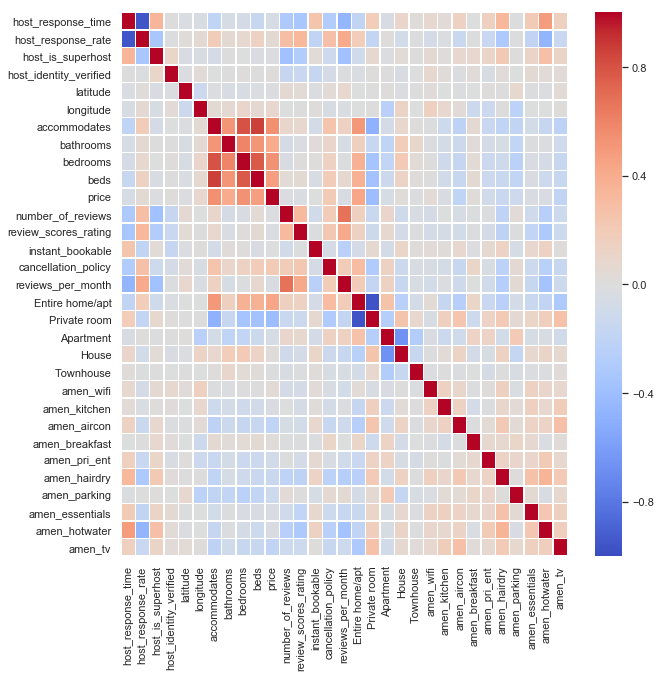

In [62]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(melb1.corr(), vmin=-1, vmax=1, cmap="coolwarm", center=0, linewidths=.5, ax=ax)

In [63]:
melb1.drop(['host_response_rate', 'bedrooms', 'beds'],axis=1, inplace=True)

## Consideration 4: As a proxy to how popular or attractive a property listing might be on airbnb's page, we will be using reviews_per_month as our target column.

### Some assumptions taken include:
* Only guests who have stayed in the property will make a review.
* The fact that a review was provided, indicates that the guest did book the place and that the property listed on the website was attractive enough, regardless of how satisfied the guest was after the stay.
* We first start off by grouping the reviews_per_month into 2 bins to indicate how much success a listing has had up to date.

### We will be using the following groupings:
1. Not Popular: <= 1 reviews_per_month
2. Popular: > 1 reviews_per_month

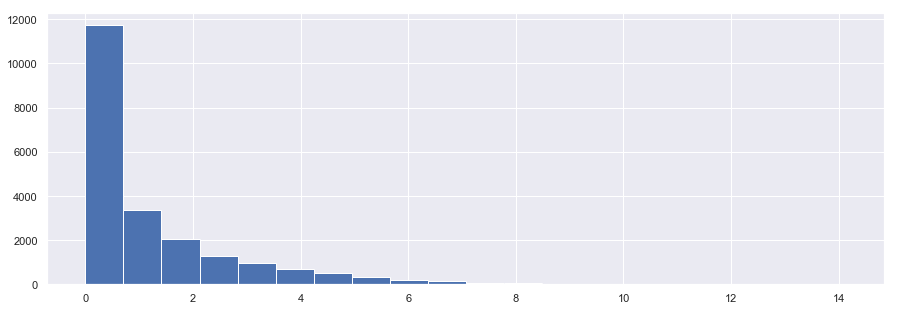

In [64]:
melb1.reviews_per_month.hist(bins=20, figsize=(15,5))

In [65]:
def f(row):
    if row['reviews_per_month'] <= 1:
        val = 0   
    else:
        val = 1
    return val

melb1.pop_2class = melb1.apply(f, axis=1)

/Users/FeliciaWilliams/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


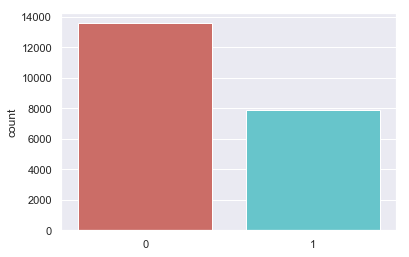

In [66]:
sns.countplot(x=melb1.pop_2class,data=melb1.pop_2class, palette='hls')
plt.show()

In [67]:
melb1.pop_2class.value_counts()

0    13579
1     7871
dtype: int64

### The data is imbalanced and we will seek to use SMOTE to try and balance out the data.

In [68]:
melb1 = pd.concat([melb1, melb1.pop_2class], axis=1)

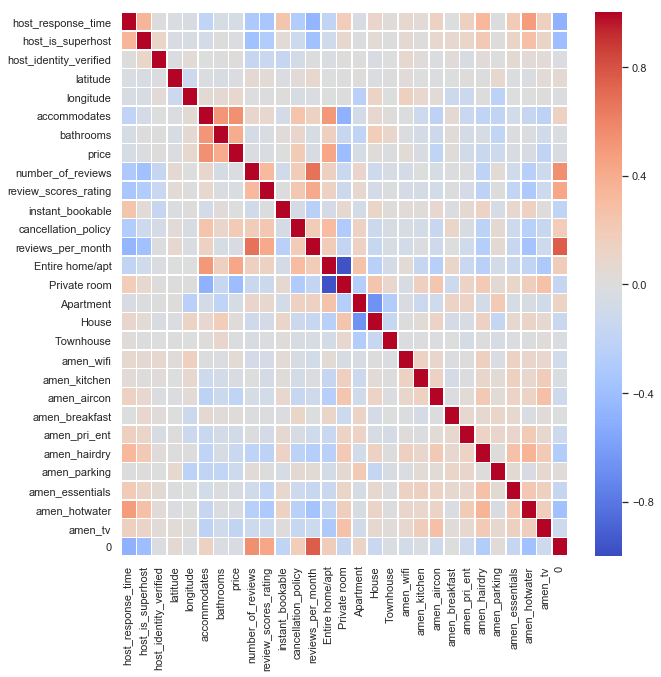

In [69]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(melb1.corr(), vmin=-1, vmax=1, cmap="coolwarm", center=0, linewidths=.5, ax=ax)

In [70]:
melb1.rename({0: 'pop_2class'}, axis=1, inplace=True)

# Applying SMOTE

In [71]:
X = melb1.drop(['pop_2class', 'reviews_per_month'], axis=1)
y_2class = melb1.pop_2class

In [72]:
len(X.columns)

27

In [73]:
!pip install imblearn

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [74]:
from imblearn.over_sampling import SMOTE
 
smote = SMOTE(kind = "regular")
X_sm, y_sm = smote.fit_sample(X, y_2class)

In [75]:
count0=0
count1=0

for i in y_sm:
    if i == 0:
        count0 += 1
    else:
        count1 += 1

print("0: " + str(count0) + "\n" + "1: " + str(count1))

0: 13579
1: 13579


## 3. Building the Model

### For this problem, we will be building a Logistic Regression model to predict how 'popular' a property listing is based on all the other features shown on a property listing.
---

### *3.1 Train_Test_Split*

In [76]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, random_state=111)

model = LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

print('Testing score: ' + str(LR.score(X_test, y_test)))
print('Training score: ' + str(LR.score(X_train, y_train)))

Testing score: 0.8768777614138439
Training score: 0.8739198743126473


In [77]:
print(model.intercept_)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)
print(coefficients)

[0.022839]
                         0         0
0       host_response_time -0.581364
1        host_is_superhost -0.202684
2   host_identity_verified  0.962320
3                 latitude  0.317624
4                longitude  0.051504
5             accommodates  0.159406
6                bathrooms  0.038391
7                    price -0.003833
8        number_of_reviews  0.109282
9     review_scores_rating  0.040472
10        instant_bookable -0.770949
11     cancellation_policy -0.300383
12         Entire home/apt  0.362530
13            Private room  0.334282
14               Apartment  0.629601
15                   House -0.102660
16               Townhouse  0.023119
17               amen_wifi -0.237625
18            amen_kitchen  0.234574
19             amen_aircon -0.123924
20          amen_breakfast  0.050212
21            amen_pri_ent -0.541000
22            amen_hairdry -0.297996
23            amen_parking  0.129203
24         amen_essentials -0.841986
25           amen_hotwater 

### Based on the coefficients,

#### *Expected relationships include:*
* host_response_time (-ve): As host_response_time is represented as a ordinal numeric value, where 0 represents the fastest reply time and 4 represents the slowest reply time, the -ve coefficient is expected as a lower value, which indicates a faster reply, would likely make guests more comfortable and inclined to book the property.
* accomoodates (+ve): The more people a property can accommodate, the more likely it is for guests to book the place. This is not surprising as it might be reflective of a more spacious and luxurious place.
* price (-ve): The higher the price, the less likely it is for guests to book the place, which is very intuitive.
* amen_wifi (-ve): For amen_wifi, where 0 represents yes and 1 represents no, the -ve coefficient is expected as guests would be more likely to book a place with available wifi.

#### *Unexpected relationships include:*
* host_identity_verified: For host_identity_verified, where 0 represents yes and 1 represents no, one would expect that it should have a negative relationship as guests might feel more safe when the host's identify is verified.
* amen_kitchen: For amen_kitchen, where 0 represents yes and 1 represents no, one would expect that having a kitchen would be more attractive if guests are looking to cook within the property. But it might be the case that guests are on holiday and do not need a place with kitchen facilities.
* amen_tv: For amen_tv, where 0 represents yes and 1 represents no, one would expect that having a tv would be more attractive for guests to unwind after a long day. But it might be the case that guests are on holiday and do not need a tv to enjoy their stay.

### One observation is that the coefficients for features that are binary are generally larger due to the fact that it is either yes or no. Features which are continous variables (e.g. price, review_scores_rating, bathrooms), where the change can be very small or very large across a wide range, tend to have a smaller coefficient.

In [78]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
cm=metrics.confusion_matrix(y_test,y_pred)

In [79]:
list1 = ["Actual 0", "Actual 1"]
list2 = ["Predicted 0", "Predicted 1"]
pd.DataFrame(cm, list1,list2)

,Predicted 0,Predicted 1
Actual 0,2907,453
Actual 1,383,3047


In [80]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87      3360
          1       0.87      0.89      0.88      3430

avg / total       0.88      0.88      0.88      6790



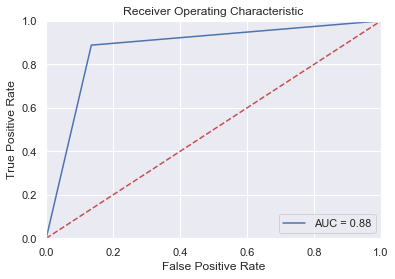

In [81]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [82]:
print(model.predict_proba(X_test[2].reshape(1,-1)))
print(y_test[2])

[[0.15637533 0.84362467]]
1


In [83]:
X_test[2]

array([  0.        ,   1.        ,   0.        , -37.82048517,
       144.95681412,   2.        ,   1.        ,  65.        ,
        19.        ,  97.        ,   0.        ,   1.        ,
         0.        ,   1.        ,   1.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         1.        ,   1.        ,   0.        ,   1.        ,
         0.        ,   0.        ,   0.        ])

### I want to show a list of probabilities with respect to changes in certain features.

### Using price as the first example, I hold every other feature constant by using the first sample of X_test to generate a list of probabilities against a range of prices.

In [84]:
print("price for X_test[2] is " + str(X_test[2][7]))

price for X_test[2] is 65.0


In [85]:
pricelist = []
arraylist = []

for k in range (50,200,10):
    pricelist.append(k)
    onelist = []
    for i in range(0, len(X_test[2])):
        if i == 7:
            onelist.append(k)
        else:
            onelist.append(X_test[2][i])
    arraylist.append(onelist)

In [86]:
pricedata = np.asarray(arraylist)
pricedata = list(model.predict_proba(pricedata))

In [87]:
priceprobalist = []
for i in pricedata:
    priceprobalist.append(i[1])

In [88]:
pd.DataFrame(priceprobalist, pricelist)

,0
50,0.851061
60,0.846137
70,0.841079
80,0.835888
90,0.830562
100,0.825099
110,0.819498
120,0.813758
130,0.807878
140,0.801858


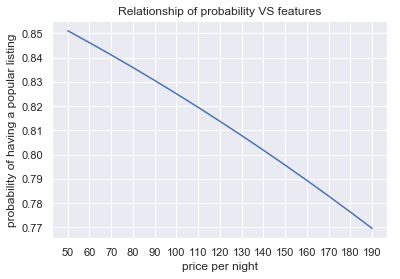

In [89]:
plt.ylabel('probability of having a popular listing')
plt.xlabel('price per night')
plt.title('Relationship of probability VS features')
plt.xticks([50,60,70,80,90,100,110,120,130,140,150,160,170,180,190])
plt.plot(pricelist, priceprobalist)

In [90]:
print("review score for X_test[2] is " + str(X_test[2][9]))

review score for X_test[2] is 97.0


In [91]:
rev_score_list = []
rev_score_arraylist = []

for k in range (80,100):
    rev_score_list.append(k)
    onelist = []
    for i in range(0, len(X_test[2])):
        if i == 9:
            onelist.append(k)
        else:
            onelist.append(X_test[2][i])
    rev_score_arraylist.append(onelist)

In [92]:
rev_score_data = np.asarray(rev_score_arraylist)
rev_score_data = list(model.predict_proba(rev_score_data))
rev_score_probalist = []
for i in rev_score_data:
    rev_score_probalist.append(i[1])

In [93]:
pd.DataFrame(rev_score_probalist, rev_score_list)

,0
80,0.730552
81,0.738444
82,0.746185
83,0.753774
84,0.761208
85,0.768486
86,0.775609
87,0.782574
88,0.789381
89,0.796031


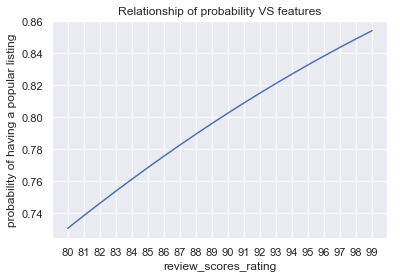

In [94]:
plt.ylabel('probability of having a popular listing')
plt.xlabel('review_scores_rating')
plt.title('Relationship of probability VS features')
plt.xticks(range(80,100))
plt.plot(rev_score_list, rev_score_probalist)

## What we want to show is that assuming a certain set of features, the model can help to advise hosts on how much a decrease in price can increase their probability of their listing being more attractive.

### For example, from the graph above, we can see that holding all other variables constant in sample 2,
* Decreasing price by $10 (from $70 to $60) only increases your probability of your property being popular by ~0.5%, which is not very significant.
* Increasing review score by 2 points (from 97 to 99), increases your probability of your property being popular by ~1%, which is not very significant.

### We take a look at another sample instead, one which inherently has a lower probability of being popular.

In [95]:
print(model.predict_proba(X_test[788].reshape(1,-1)))
print(y_test[788])

[[0.78097763 0.21902237]]
0


In [96]:
X_test[788]

array([  0.        ,   1.        ,   1.        , -37.84186694,
       144.93667424,   4.        ,   1.        , 319.        ,
         1.        ,  80.        ,   0.        ,   1.        ,
         1.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         1.        ,   1.        ,   0.        ,   1.        ,
         0.        ,   0.        ,   0.        ])

In [97]:
# With respect to sample 788, we try to decrease price (from $319 to $250)
# AND 
# make the cancellation policy more lenient (from moderate to flexible).

new_sample = [  0.        ,   1.        ,   1.        , -37.84186694,
       144.93667424,   4.        ,   1.        , 250.        ,
         1.        ,  80.        ,   0.        ,   0.        ,
         1.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         1.        ,   1.        ,   0.        ,   1.        ,
         0.        ,   0.        ,   0.        ]
new_sample = np.asarray(new_sample)

In [98]:
model.predict_proba(new_sample.reshape(1,-1))

array([[0.66962522, 0.33037478]])

### We can see that doing so increases the probability of the property being popular by ~12% (from 22% to 34%).

### We now see what happens if we assume that the lower price (i.e. 250) is maintained and that the property receives an increase in the number of bookings (from 1 to 8).

In [99]:
new_sample = [  0.        ,   1.        ,   1.        , -37.84186694,
       144.93667424,   4.        ,   1.        , 250.        ,
         8.        ,  80.        ,   0.        ,   1.        ,
         1.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         1.        ,   1.        ,   0.        ,   1.        ,
         0.        ,   0.        ,   0.        ]
new_sample = np.asarray(new_sample)

In [100]:
model.predict_proba(new_sample.reshape(1,-1))

array([[0.56018099, 0.43981901]])

### We can see by having a higher number of ratings can greatly increase your probability of having a popular property listing. Although there is a high correlation between these 2 variables, one thing that is not taken into account is the length of time for the total number of ratings. 

In [101]:
new_sample_w_amen = [  0.        ,   1.        ,   1.        , -37.84186694,
       144.93667424,   4.        ,   1.        , 250.        ,
         8.        ,  80.        ,   0.        ,   1.        ,
         1.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ]
new_sample_w_amen = np.asarray(new_sample_w_amen)
print("Probability of Popular with all amenities is " + str(model.predict_proba(new_sample_w_amen.reshape(1,-1))))

new_sample_wo_amen = [  0.        ,   1.        ,   1.        , -37.84186694,
       144.93667424,   4.        ,   1.        , 250.        ,
         8.        ,  80.        ,   0.        ,   1.        ,
         1.        ,   0.        ,   0.        ,   0.        ,
         1.        ,   1.        ,   1.        ,   1.        ,
         1.        ,   1.        ,   1.        ,   1.        ,
         1.        ,   1.        ,   1.        ]
new_sample_wo_amen = np.asarray(new_sample_wo_amen)
print("Probability of Popular without any amenities is " + str(model.predict_proba(new_sample_wo_amen.reshape(1,-1))))

Probability of Popular with all amenities is [[0.47011356 0.52988644]]
Probability of Popular without any amenities is [[0.83855416 0.16144584]]


### On the contrary, if we were to compare with and without the 10 chosen amenities, we can see that having all 10 amenities can help to increase the probability by about 3 times (55% vs 17%), as opposed to having no amenities at all.

## While some of these insights might be quite intuitive, the aim is to devise a strategy to better advise NEW hosts as to how to attract potential guests from the start. Therefore, what we can seek to advise NEW property owners would be to set a lower price, provide more amenities, until a steady base is established, before raising prices to what might be ideal for the hosts.

### *3.2 K-fold Cross Validation*

In [102]:
from sklearn.linear_model import LogisticRegressionCV

for i in (3,5,10):
    clf = LogisticRegressionCV(cv=i, random_state=0).fit(X_sm, y_sm)
    print(str(i) + "-fold: " + str(clf.score(X_sm, y_sm)))

3-fold: 0.8740702555416452
5-fold: 0.8741807202297666
10-fold: 0.8742175417924737


### Using K-fold cross validation gives us a score that is very much the same as a train-test-split at about 87% accuracy.

## 4. Trying out a multi-class target.

In [103]:
def f(row):
    if row['reviews_per_month'] <= 0.5:
        val = 0   
    elif row['reviews_per_month'] <= 2:
        val = 1
    else:
        val = 2
    return val

melb1.pop_3class = melb1.apply(f, axis=1)

/Users/FeliciaWilliams/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


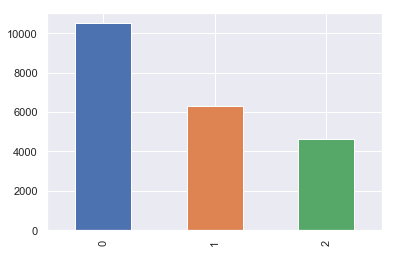

In [104]:
melb1.pop_3class.value_counts().plot(kind="bar")

In [105]:
# Applying SMOTE to the other 2 classes.
y_3class = melb1.pop_3class
 
smote = SMOTE(kind = "regular")
X_3_sm, y_3_sm = smote.fit_sample(X, y_3class)

In [106]:
# Doing a quick count check of all 3 classes after SMOTE.

count0=0
count1=0
count2=0

for i in y_3_sm:
    if i == 0:
        count0 += 1
    elif i == 1:
        count1 += 1 
    else:
        count2 += 1

print("0: " + str(count0) + "\n" + "1: " + str(count1) + "\n" + "2: " + str(count1))

0: 10510
1: 10510
2: 10510


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_3_sm,y_3_sm, random_state=111)

ovr_clf = LogisticRegression(random_state=0, multi_class='ovr')
model = ovr_clf.fit(X_train,y_train)

y_pred = ovr_clf.predict(X_test)

print('Testing score: ' + str(ovr_clf.score(X_test, y_test)))
print('Training score: ' + str(ovr_clf.score(X_train, y_train)))

Testing score: 0.748446023087657
Training score: 0.7515118196811434


In [108]:
cm=metrics.confusion_matrix(y_test,y_pred)
list1 = ["Actual 0", "Actual 1", "Actual 2"]
list2 = ["Predicted 0", "Predicted 1", "Predicted 2"]
pd.DataFrame(cm, list1,list2)

,Predicted 0,Predicted 1,Predicted 2
Actual 0,2155,432,12
Actual 1,349,1726,594
Actual 2,12,584,2019


In [109]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.86      0.83      0.84      2599
          1       0.63      0.65      0.64      2669
          2       0.77      0.77      0.77      2615

avg / total       0.75      0.75      0.75      7883



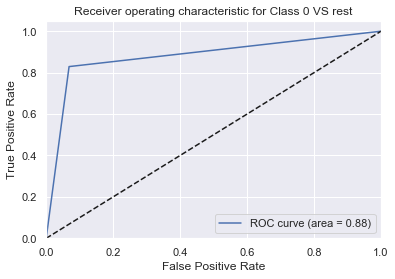

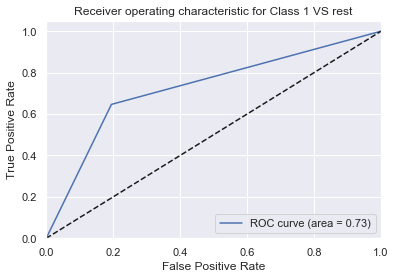

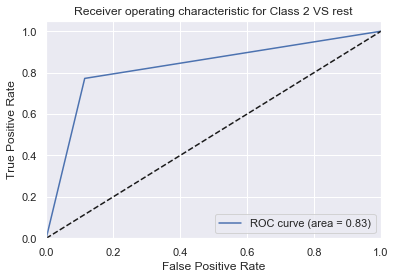

In [115]:
for i in range(3):
    fpr, tpr, threshold = metrics.roc_curve(y_test1[:, i], y_pred1[:, i])
    roc_auc = metrics.auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for Class ' + str(i) + ' VS rest')
    plt.legend(loc="lower right")
    plt.show()

# Conclusion:

### Using a 2-class logistic regression model, the accuracy of predicting whether a property is "popular" increases from 50% (base) to ~87%.
### Using a 3-class logistic regression model, the accuracy of predicting whether a property is "popular" increases from 33% (base) to ~75%.

#### While the results seem encouraging, the model is not without its limitations. Some of these include:
* Target column used is only a proxy and not based on the actual bookings for the property.
* The grouping of "popular" for target column currently does not take into account the LENGTH of booking per guest. For example, if 1 guest were to book a property for 3 weeks VS 1 day, they might both show only 1 review per month, but the actual occupancy rate would be very different.
* The model might seem quite effective because it can be regarded as an "easy" classification problem. Reducing prices and/or increasing more amenities is already quite intuitive in whether your probability will increase or not.

#### However, what the model strives to achieve is how to best balance / optimize a change in the property features against how likely it is for the property to be "popular". Some examples include:
* Is it worth it to provide breakfast if it only increases the probability by 5%?
* Is it worth it to reduce prices by $50 per night if it only increases the probability by 5%?
* Is it worth it to make my property instant bookable if it only increases the probability by 5%?

### Moving forward, some improvements to the model could include:
* Using NLP to find out if certain words used in the naming and description of the property could make it more "popular".
* Using additional features to see if we can increase the model score.
* To combine data from other locations (e.g. countries / cities) to see if a generalised model works as well as a location specific model.